**
Job Distribution by Location Analysis: This analysis offers insights into the spatial distribution of job postings across various locations, shedding light on regions where demand for specific job roles is particularly high. By examining job distribution patterns, it becomes possible to discern geographic areas where certain industries thrive or where specific skills are in high demand. Understanding regional job distributions can aid job seekers in targeting their search efforts to areas with ample opportunities in their field.

In [1]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder \
    .appName("JobDistributionAnalysis") \
    .getOrCreate()

# Load the dataset from CSV file into a DataFrame
df = spark.read.csv("preprocessed_data.csv", header=True)

# Group the data by job location and count the number of job postings in each location
location_counts = df.groupBy("job_location").count().alias("job_count")

# Sort the locations based on the number of job postings
sorted_locations = location_counts.orderBy(col("count").desc())

# Display the results
sorted_locations.show()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/30 15:17:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+--------------------+-----+
|        job_location|count|
+--------------------+-----+
|        New York, NY|12579|
|London, England, ...|10878|
|         Houston, TX|10332|
|         Chicago, IL|10187|
|     Los Angeles, CA| 9736|
|         Atlanta, GA| 8738|
|          Boston, MA| 7924|
|          Dallas, TX| 7514|
|          Austin, TX| 7235|
|      Washington, DC| 6869|
|         Phoenix, AZ| 6722|
|       San Diego, CA| 6532|
|       Charlotte, NC| 6470|
|    Philadelphia, PA| 6326|
|         Seattle, WA| 6235|
|     San Antonio, TX| 6102|
|           Tampa, FL| 5701|
|   San Francisco, CA| 5684|
|        Columbus, OH| 5552|
|       Las Vegas, NV| 5468|
+--------------------+-----+
only showing top 20 rows



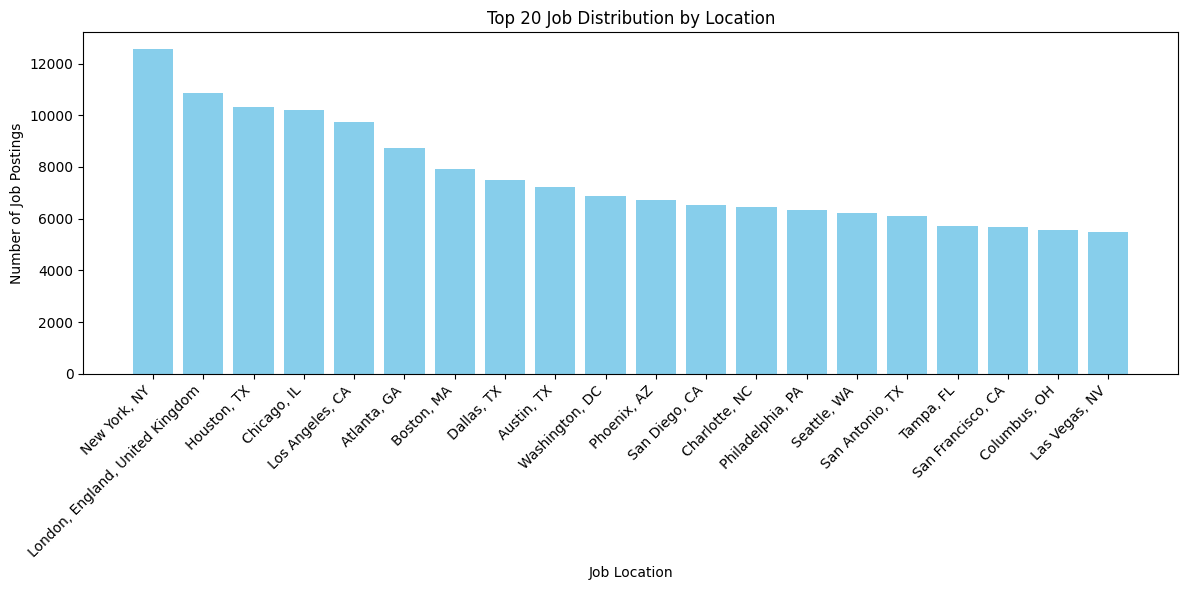

In [2]:
import matplotlib.pyplot as plt

# Check if sorted_locations is not empty
if sorted_locations.count() == 0:
    print("No data available for visualization.")
else:
    # Convert the sorted_locations DataFrame to Pandas DataFrame for visualization
    location_counts_pd = sorted_locations.toPandas()

    # Take top 20 locations
    top_20_locations_pd = location_counts_pd.head(20)

    # Filter out rows with missing values in "job_location" or "count" columns
    filtered_locations_pd = top_20_locations_pd.dropna(subset=["job_location", "count"])

    if filtered_locations_pd.empty:
        print("No data available for visualization.")
    else:
        # Plot the bar chart for top 20 locations
        plt.figure(figsize=(12, 6))
        plt.bar(filtered_locations_pd["job_location"], filtered_locations_pd["count"], color='skyblue')
        plt.xlabel('Job Location')
        plt.ylabel('Number of Job Postings')
        plt.title('Top 20 Job Distribution by Location')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


**Company Recruitment Activity Analysis**: This analysis delves into the recruitment patterns and practices of diverse companies, aiming to uncover organizations that are actively seeking talent across a spectrum of positions. By examining the recruitment activity of different companies, insights can be gained into industry trends, competitive landscapes, and emerging market players. Understanding which companies are actively hiring and for which positions provides valuable intelligence for job seekers, allowing them to target their job search efforts more effectively. 

In [3]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder \
    .appName("CompanyRecruitmentActivityAnalysis") \
    .getOrCreate()

# Load the dataset from CSV file into a DataFrame
df = spark.read.csv("preprocessed_data.csv", header=True)

# Group the data by company and count the number of job postings for each company
company_counts = df.groupBy("company").count().alias("job_count")

# Sort the companies based on the number of job postings
sorted_companies = company_counts.orderBy(col("count").desc())

# Display the top 10 companies by recruitment activity
sorted_companies.show(20, truncate=False)




24/04/30 15:19:04 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-----------------------------------+-----+
|company                            |count|
+-----------------------------------+-----+
|Health eCareers                    |40047|
|Jobs for Humanity                  |25629|
|TravelNurseSource                  |15997|
|Dollar General                     |14775|
|PracticeLink                       |9043 |
|Energy Jobline                     |8987 |
|Gotham Enterprises Ltd             |8700 |
|Jobot                              |8264 |
|ClearanceJobs                      |8015 |
|McDonald's                         |7742 |
|VolunteerMatch                     |6653 |
|Walmart                            |6455 |
|DocCafe                            |6026 |
|H&R Block                          |5668 |
|Circle K                           |5493 |
|CyberCoders                        |5273 |
|ClickJobs.io                       |5105 |
|Michael Page                       |4560 |
|U.S. Department of Veterans Affairs|4473 |
|Family Dollar                  

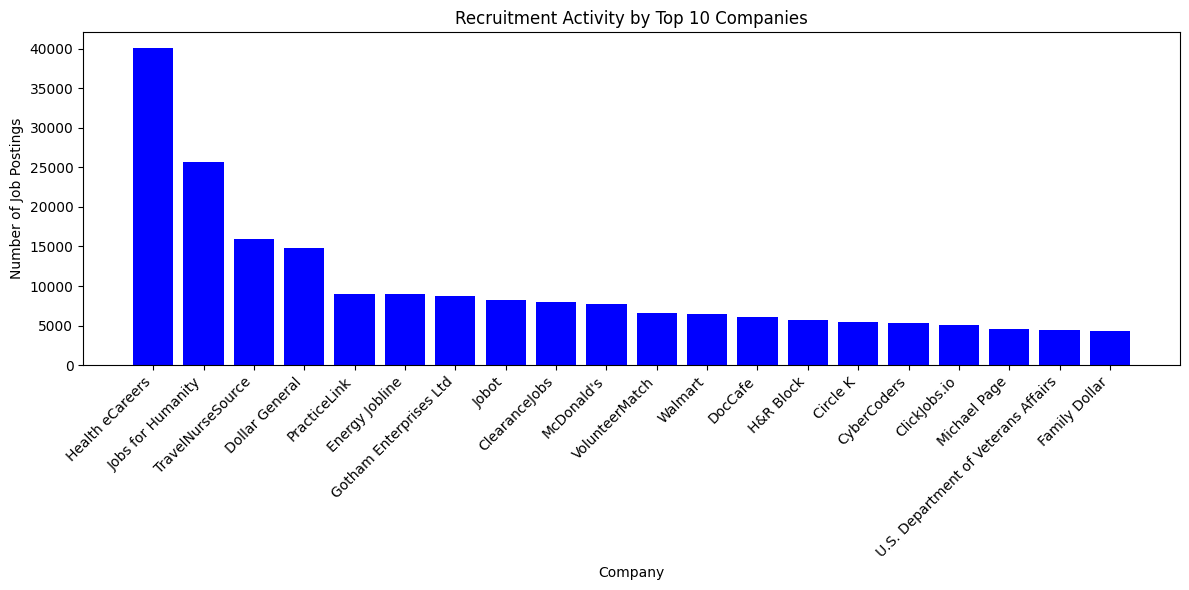

In [4]:
import matplotlib.pyplot as plt

# Convert the sorted_companies DataFrame to Pandas DataFrame for visualization
company_counts_pd = sorted_companies.limit(20).toPandas()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(company_counts_pd["company"], company_counts_pd["count"], color='blue')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.title('Recruitment Activity by Top 10 Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Job Title Frequency Analysis**: This analysis seeks to unveil the distribution and prevalence of various job titles within the dataset, shedding light on the most common and sought-after job roles across different industries and sectors. By discerning the frequency of job titles, organizations and job seekers can gain valuable insights into emerging job trends, key areas of expertise, and potential career paths. Understanding the landscape of job titles can inform recruitment strategies, workforce planning, and talent development initiatives, ultimately contributing to more informed decision-making processes.

In [5]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("JobTitlesFrequencyAnalysis") \
    .getOrCreate()

# Load the dataset from CSV file into a DataFrame
df = spark.read.csv("preprocessed_data.csv", header=True)

# Group the data by job title and count the number of occurrences of each job title
job_title_counts = df.groupBy("job_title").count().alias("job_count")

# Sort the job titles based on their frequency
sorted_job_titles = job_title_counts.orderBy(col("count").desc())

# Display the top 10 job titles by frequency
sorted_job_titles.show(20, truncate=False)



24/04/30 15:19:34 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+---------------------------------------------------+-----+
|job_title                                          |count|
+---------------------------------------------------+-----+
|LEAD SALES ASSOCIATE-FT                            |7315 |
|Shift Manager                                      |5500 |
|First Year Tax Professional                        |5351 |
|Customer Service Representative                    |5165 |
|Assistant Manager                                  |5067 |
|LEAD SALES ASSOCIATE-PT                            |4911 |
|Store Manager                                      |4739 |
|CUSTOMER SERVICE REPRESENTATIVE                    |4214 |
|Registered Nurse                                   |4142 |
|Hourly Supervisor & Training                       |2883 |
|Host                                               |2861 |
|Travel Allied Health Professional - CT Technologist|2717 |
|Account Executive                                  |2614 |
|Senior Accountant                      

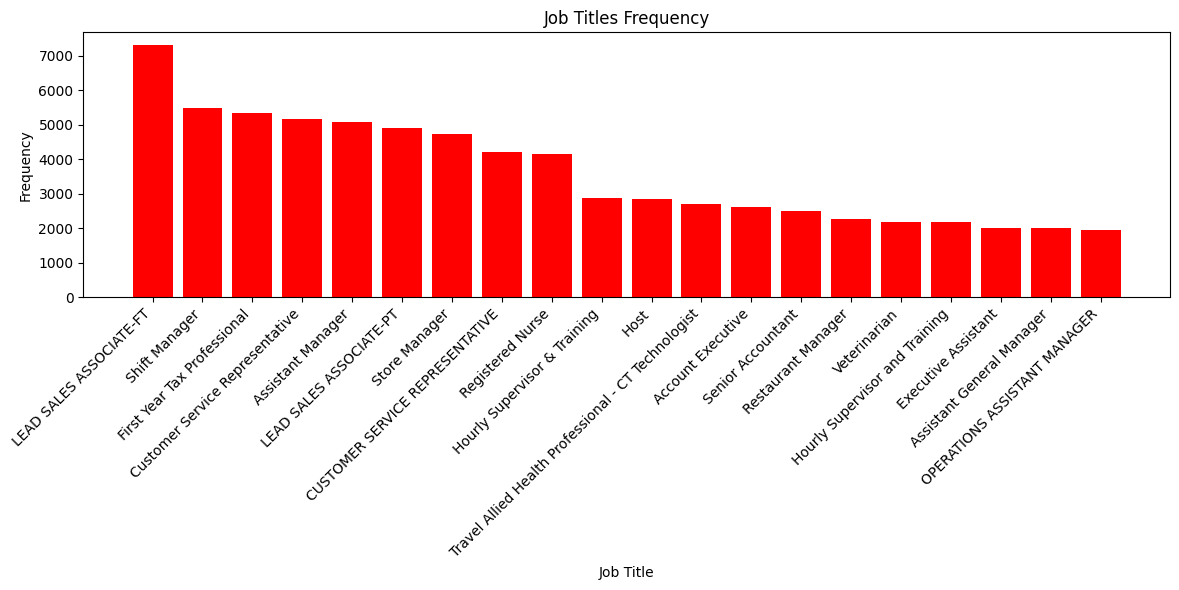

In [6]:
import matplotlib.pyplot as plt

# Convert the sorted_job_titles DataFrame to Pandas DataFrame for visualization
job_title_counts_pd = sorted_job_titles.limit(20).toPandas()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(job_title_counts_pd["job_title"], job_title_counts_pd["count"], color='red')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.title('Job Titles Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Skill Demand Analysis**: This investigation aims to discern the prevailing skills sought after across various job postings, providing insights into the evolving landscape of skill requirements within different roles and industries. By analyzing the most in-demand skills, organizations and job seekers can gain valuable intelligence to tailor training programs, recruitment strategies, and career development plans accordingly.

In [7]:

# Initialize Spark session
spark = SparkSession.builder \
    .appName("SkillDemandAnalysis") \
    .getOrCreate()

# Load the dataset from CSV file into a DataFrame
df = spark.read.csv("preprocessed_data.csv", header=True)

# Extract skills from the "job_skills" column
skills_df = df.select("job_skills")

from collections import Counter

# Extract skills from the "job_skills" column and split into individual skills
skills_rdd = df.rdd.flatMap(lambda row: row.job_skills.split(", ") if row.job_skills else [])

# Print the first few elements of the RDD to inspect the data
print("First few elements of the RDD:")
print(skills_rdd.take(10))


24/04/30 15:20:05 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


First few elements of the RDD:


['medical equipment sales', 'key competitors', 'terminology', 'technology', 'trends', 'challenges', 'reimbursement', 'government regulation', 'bd offerings', 'pipeline management']


In [8]:
# Count the frequency of each skill
skill_counts = skills_rdd.map(lambda skill: (skill, 1)).reduceByKey(lambda x, y: x + y)

# Sort the skills based on their frequency
sorted_skills = skill_counts.sortBy(lambda x: x[1], ascending=False)

# Display the top 20 most in-demand skills
top_skills = sorted_skills.take(20)
for skill, count in top_skills:
    print(f"{skill}: {count}")


communication: 370020
customer service: 278012
teamwork: 227535
communication skills: 195820
leadership: 185134
problem solving: 148987
time management: 142861
attention to detail: 133916
problemsolving: 129293
project management: 121515
interpersonal skills: 100218
patient care: 99906
sales: 92977
nursing: 87945
collaboration: 87080
training: 83638
data analysis: 81945
microsoft office suite: 75507
organizational skills: 75245
inventory management: 71899


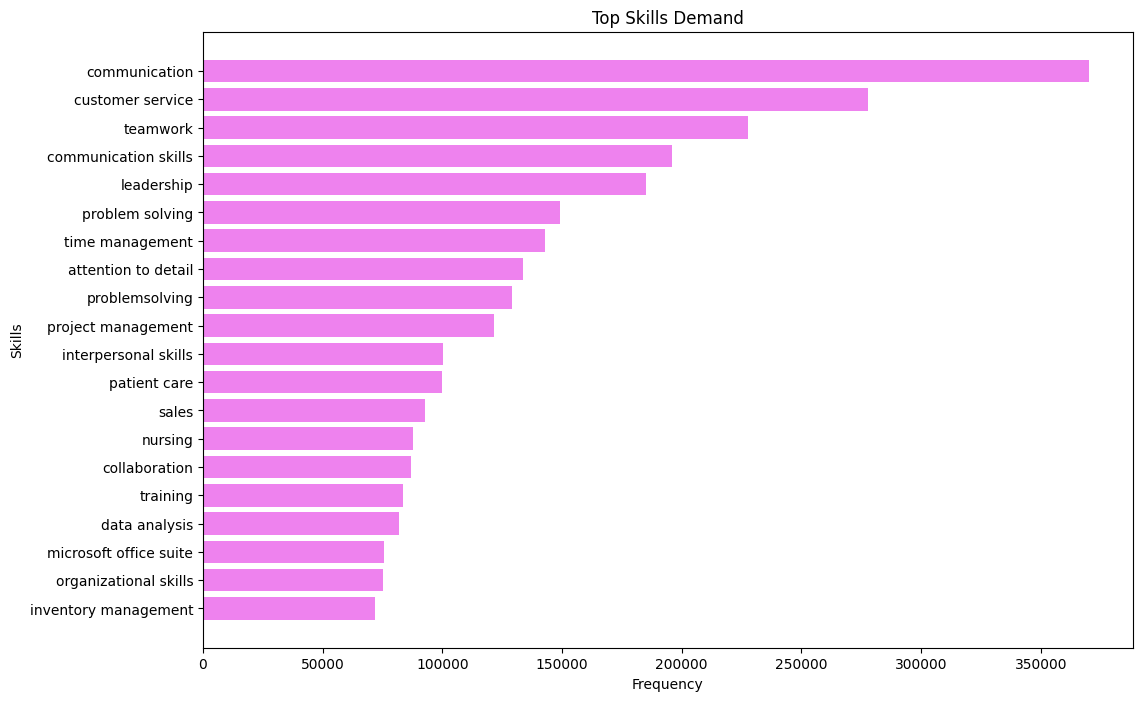

In [9]:
import matplotlib.pyplot as plt

# Convert RDD to Python list
skill_counts_list = skill_counts.collect()

# Sort the list of skills based on frequency in descending order
skill_counts_sorted = sorted(skill_counts_list, key=lambda x: x[1], reverse=True)

# Extract skill names and frequencies from the list
skills = [x[0] for x in skill_counts_sorted[:20]]  # Top 20 skills
frequencies = [x[1] for x in skill_counts_sorted[:20]]

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.barh(skills, frequencies, color='violet')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top Skills Demand')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent skills at the top
plt.show()


**Job Type Analysis**: Explore the prevailing job types within the industry to discern whether onsite or remote positions dominate. This analysis aims to provide insights into the distribution of job opportunities between onsite and remote work settings, shedding light on the evolving landscape of employment preferences and practices.

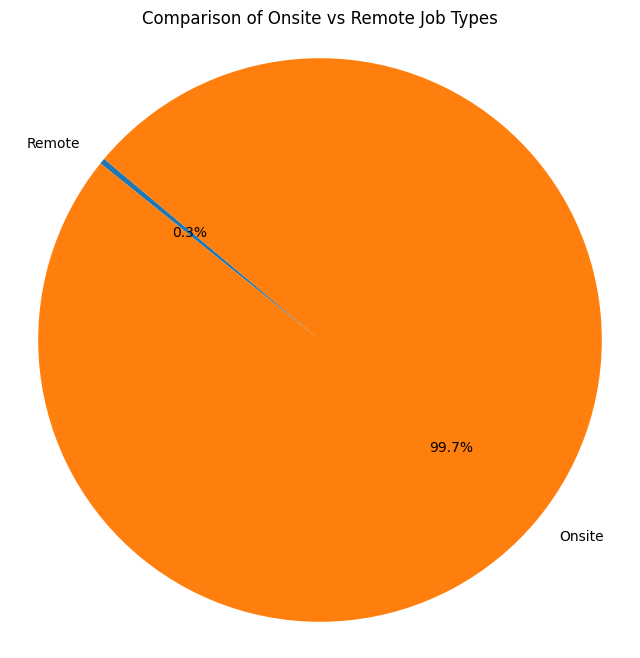

In [10]:
# Extract job types from the "job_type" column
job_types_df = df.select("job_type")

# Remove rows with missing job type values
filtered_job_types_df = job_types_df.filter(job_types_df["job_type"].isNotNull())

# Count the occurrences of each job type
job_type_counts = filtered_job_types_df.groupBy("job_type").count()

# Convert the DataFrame to Pandas DataFrame for visualization
job_type_counts_pd = job_type_counts.toPandas()

# Filter out job types other than "onsite" and "remote"
filtered_job_type_counts_pd = job_type_counts_pd[job_type_counts_pd["job_type"].isin(["Onsite", "Remote"])]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_job_type_counts_pd["count"], labels=filtered_job_type_counts_pd["job_type"], autopct='%1.1f%%', startangle=140)
plt.title('Comparison of Onsite vs Remote Job Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Geographical Distribution of Job Postings**: This analysis seeks to elucidate the countries with the highest volume of job postings. By identifying the geographic hotspots of employment opportunities, this examination offers valuable insights into regional job market trends, economic dynamics, and potential areas of growth or saturation.

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder \
    .appName("TopCountriesJobPostings") \
    .getOrCreate()


# Filter the column to include only valid country names
filtered_countries = df.filter(col("search_country").rlike("^[A-Za-z ]+$"))

# Group by job_location and count occurrences
country_counts = filtered_countries.groupBy("search_country").count()

# Sort in descending order based on count
top_countries = country_counts.orderBy(desc("count"))

# Show the top N countries
top_countries.show()

24/04/30 15:22:56 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+------------------+-------+
|    search_country|  count|
+------------------+-------+
|     United States|1105364|
|    United Kingdom| 108487|
|            Canada|  53903|
|         Australia|  28540|
|             Akron|      7|
|      Fayetteville|      2|
|          Columbus|      2|
|        Alexandria|      1|
|         Oceanside|      1|
|Clinical Therapist|      1|
|     North Chicago|      1|
|           Beverly|      1|
|            Layton|      1|
|        Pittsfield|      1|
|         Hollywood|      1|
| Fort Walton Beach|      1|
|         Nashville|      1|
|           Garland|      1|
|          Arkansas|      1|
|          Chandler|      1|
+------------------+-------+
only showing top 20 rows



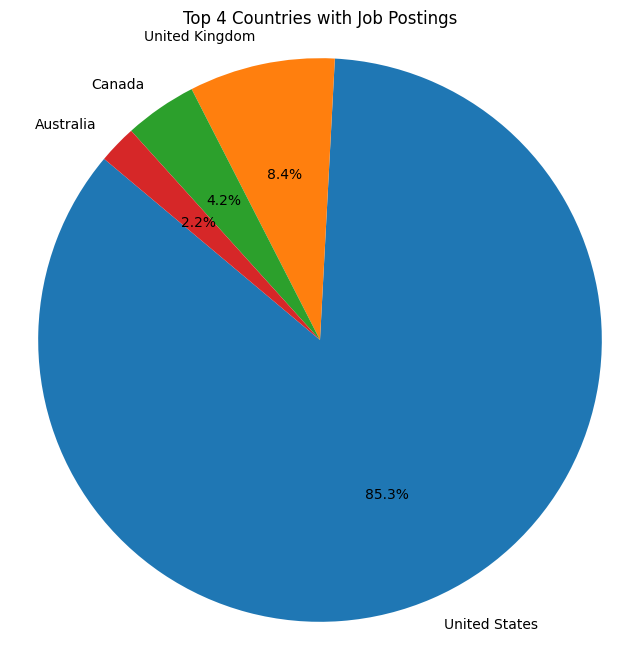

In [12]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the top_countries DataFrame

# Extract country names and counts from the DataFrame
country_names = top_countries.select("search_country").rdd.flatMap(lambda x: x).collect()[:4]
country_counts = top_countries.select("count").rdd.flatMap(lambda x: x).collect()[:4]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_names, autopct='%1.1f%%', startangle=140)
plt.title('Top 4 Countries with Job Postings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()